In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# EDA

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Jean-njoroge/Breast-cancer-risk-prediction/master/data/data.csv')
df.drop(columns=['id'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/Users/utkarshgoyal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


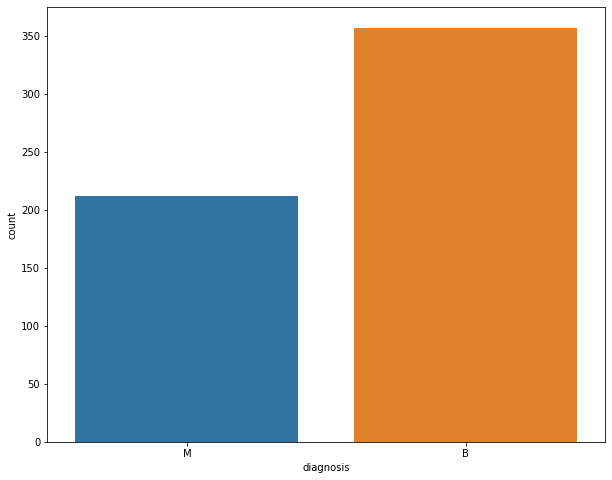

In [5]:
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(df['diagnosis'],label='Count')
plt.show()

# Data Preprocessing

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df3 = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
df3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Feature Importance

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [11]:
estimator = RandomForestClassifier()
selector = RFE(estimator, verbose=True)
selector = selector.fit(df3, y)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


In [12]:
X_selected = df3[selector.get_feature_names_out()]
X_selected.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1.097064,-2.073335,1.269934,0.984375,2.652874,2.532475,2.487578,1.886690,-1.359293,2.303601,2.001237,1.307686,2.109526,2.296076,2.750622
1,1.829821,-0.353632,1.685955,1.908708,-0.023846,0.548144,0.742402,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.146749,1.087084,-0.243890
2,1.579888,0.456187,1.566503,1.558884,1.363478,2.037231,1.181336,1.511870,-0.023974,1.347475,1.456285,0.527407,0.854974,1.955000,1.152255
3,-0.768909,0.253732,-0.592687,-0.764464,1.915897,1.451707,-0.288378,-0.281464,0.133984,-0.249939,-0.550021,3.394275,1.989588,2.175786,6.046041
4,1.750297,-1.151816,1.776573,1.826229,1.371011,1.428493,1.190357,1.298575,-1.466770,1.338539,1.220724,0.220556,0.613179,0.729259,-0.868353


In [13]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_selected, y)

RandomForestClassifier(random_state=0)

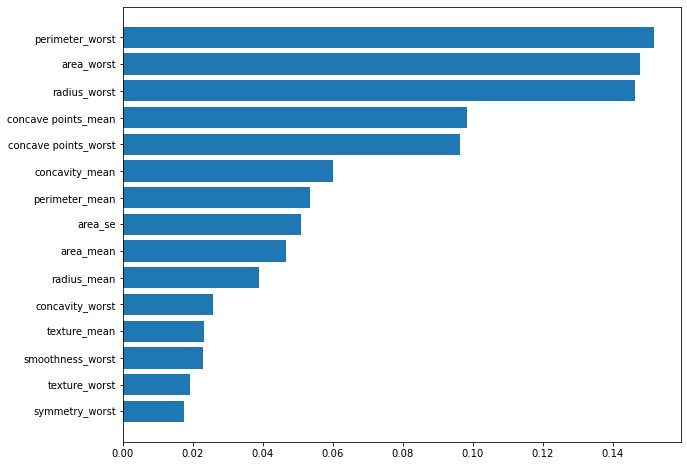

In [14]:
df_feature = pd.DataFrame(zip(selector.get_feature_names_out(),forest.feature_importances_), columns=['Feature', 'Importance']).sort_values('Importance')

plt.barh(df_feature.Feature, df_feature.Importance)
plt.show()

In [15]:
features = df_feature[df_feature['Importance']>0.05]['Feature'].tolist()

In [17]:
X_features = X_selected[features]
X_features.head()

,area_se,perimeter_mean,concavity_mean,concave points_worst,concave points_mean,radius_worst,area_worst,perimeter_worst
0,2.487578,1.269934,2.652874,2.296076,2.532475,1.886690,2.001237,2.303601
1,0.742402,1.685955,-0.023846,1.087084,0.548144,1.805927,1.890489,1.535126
2,1.181336,1.566503,1.363478,1.955000,2.037231,1.511870,1.456285,1.347475
3,-0.288378,-0.592687,1.915897,2.175786,1.451707,-0.281464,-0.550021,-0.249939
4,1.190357,1.776573,1.371011,0.729259,1.428493,1.298575,1.220724,1.338539


# Modelling

In [26]:
from scipy import stats

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [30]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',max_iter=-1),
        'params' : {
            'C': [1, 5],
            'probability':[True, False]
        }  
    },

    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [5, 10, 20, 30],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000],
            'criterion' : ['gini','entropy'], 
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['newton-cg', 'liblinear']
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },
    'xgboost':{'model':XGBClassifier(), 
              'params':{
              'n_estimators': [100, 150, 500, 1000],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.5, 0.75, 0.9],
              
                  }
              }
}

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=StratifiedKFold(5), return_train_score=False)
    clf.fit(X_features, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

svm
kneighbours
random_forest
logistic_regression
decision_tree
xgboost


In [32]:
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df.sort_values('best_score')

,model,best_score,best_params
4,decision_tree,0.905108,"{'criterion': 'entropy', 'max_depth': 1, 'min_..."
2,random_forest,0.927977,"{'criterion': 'entropy', 'max_depth': 1, 'min_..."
1,kneighbours,0.947275,{'n_neighbors': 20}
3,logistic_regression,0.952554,"{'C': 5, 'solver': 'newton-cg'}"
5,xgboost,0.952569,"{'colsample_bytree': 0.9, 'learning_rate': 0.5..."
0,svm,0.952585,"{'C': 5, 'probability': True}"


# Best Model

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.33, random_state=42, stratify=y)

In [34]:
model = SVC(gamma='auto',max_iter=-1, C=5, probability=True)
model.fit(X_train, y_train)

SVC(C=5, gamma='auto', probability=True)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       118
           1       1.00      0.84      0.91        70

    accuracy                           0.94       188
   macro avg       0.96      0.92      0.94       188
weighted avg       0.95      0.94      0.94       188



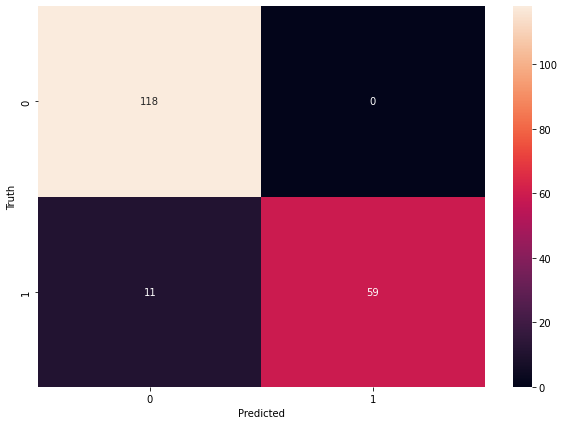

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()